<h1>Deep Learning</h1>
<li>Rough idea: mimic the human brain (not that we know how that works!)
<li>Neural networks: learn through examples with no procedural learning algorithm
<li>As wikipedia says: <span style="color:blue">vaguely</span> inspired by animal brains

<h2>Structure of neural networks</h2>
<li>A neural network is a directed acyclic graph
<li><span style="color:red">Neurons</span>: nodes
<li><span style="color:red">Synapses</span>: connections (edges) between nodes that contain weights
<li>a neuron calculates a weighted sum of its input nodes and then decides whether to fire or not (should it react to the input or not)
<li><span style="color:red">Activation functions</span>: the function that makes the activation decision
<li><span style="color:red">Layers</span>: aggregations of neurons that use the same transformation function (different layers can use different functions)
<li><span style="color:red">Input layer</span>: feature values from example cases enter the network here (think of it as the sensory organ of the network)
<li><span style="color:red">Output layer</span>: the result (action) layer (classes, continuous values)
<li><span style="color:red">Hidden layer</span>: all the layers between the input and output layers

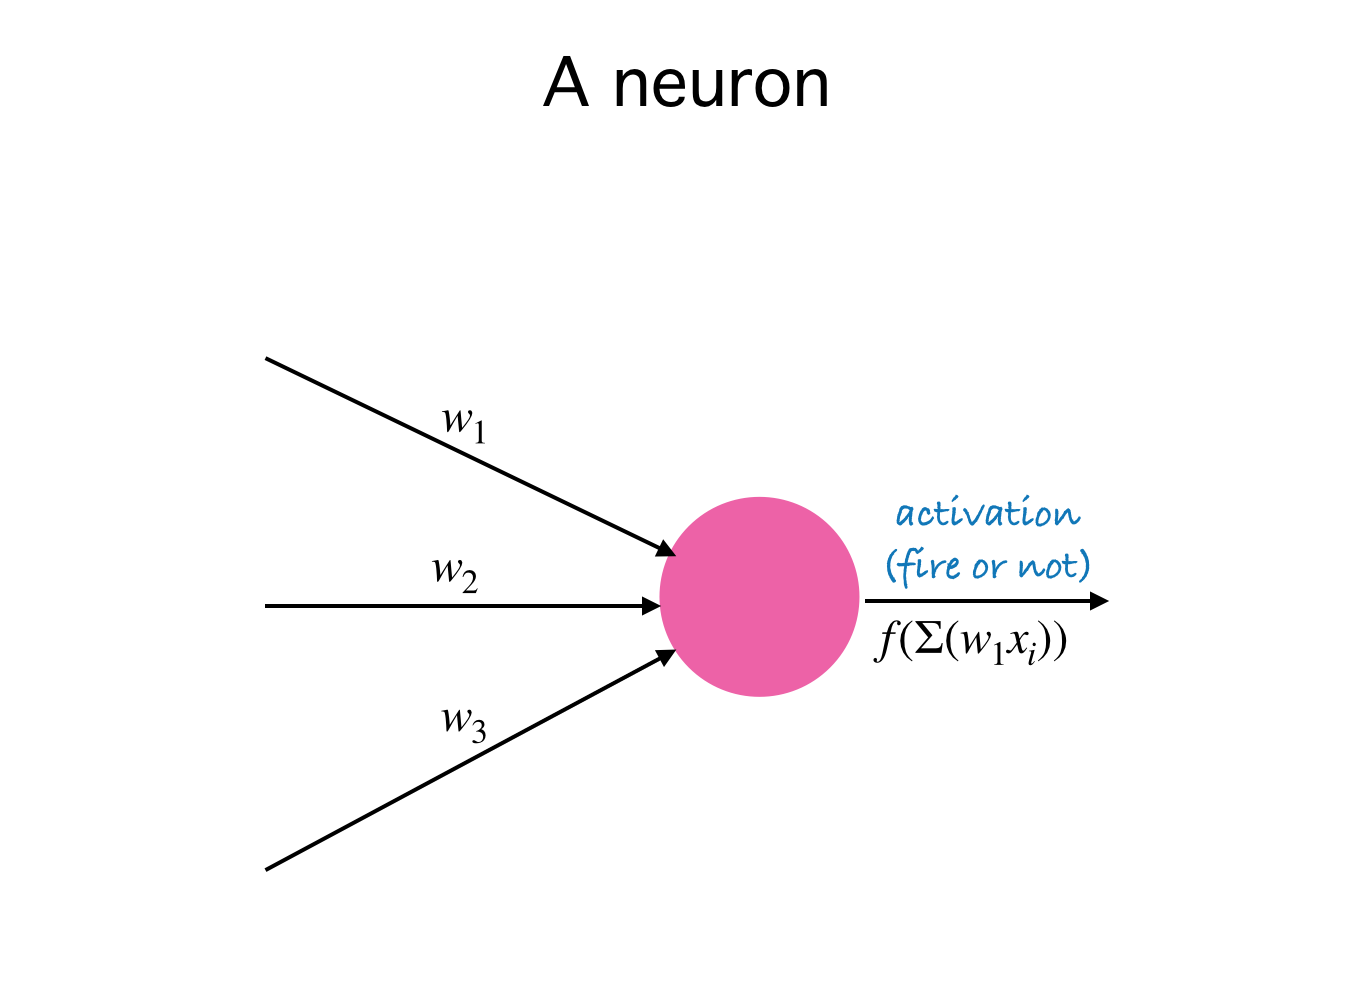

In [1]:
from IPython.display import Image
Image(filename="neuron.png",height=500,width=500)

<h2>Example of a network</h2>
<small>from: <i>https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg</i></small>

In [2]:
from IPython.display import Image
Image(url="https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg")

<h2>Rough procedure: "for dummies"!</h2>
<li>INITIALIZE: randomly assign weights to each connection
<li>RUN:
<ol>
<li>give an example to the network
<li>calculate the weighted sum of inputs at each neuron
<li>apply the activation function to each weighted sum
<li>do this layer by layer until you get the output layer values
<li>calculate the difference between calculated values and actual values
<li>tweak weights in the entire network so that the calculate output gets "marginally" closer to the actual value
<li>rinse and repeat

<h1>A super simple example</h1>
<li>Each input case has 3 features, each of which is either a 0 or a 1
<li>Classify inputs into either class 0 or class 1
<li>We know that if feature 1 is 0, then the class is 0 and if feature 1 is 1, the class is 1
<li>We want the net to learn this

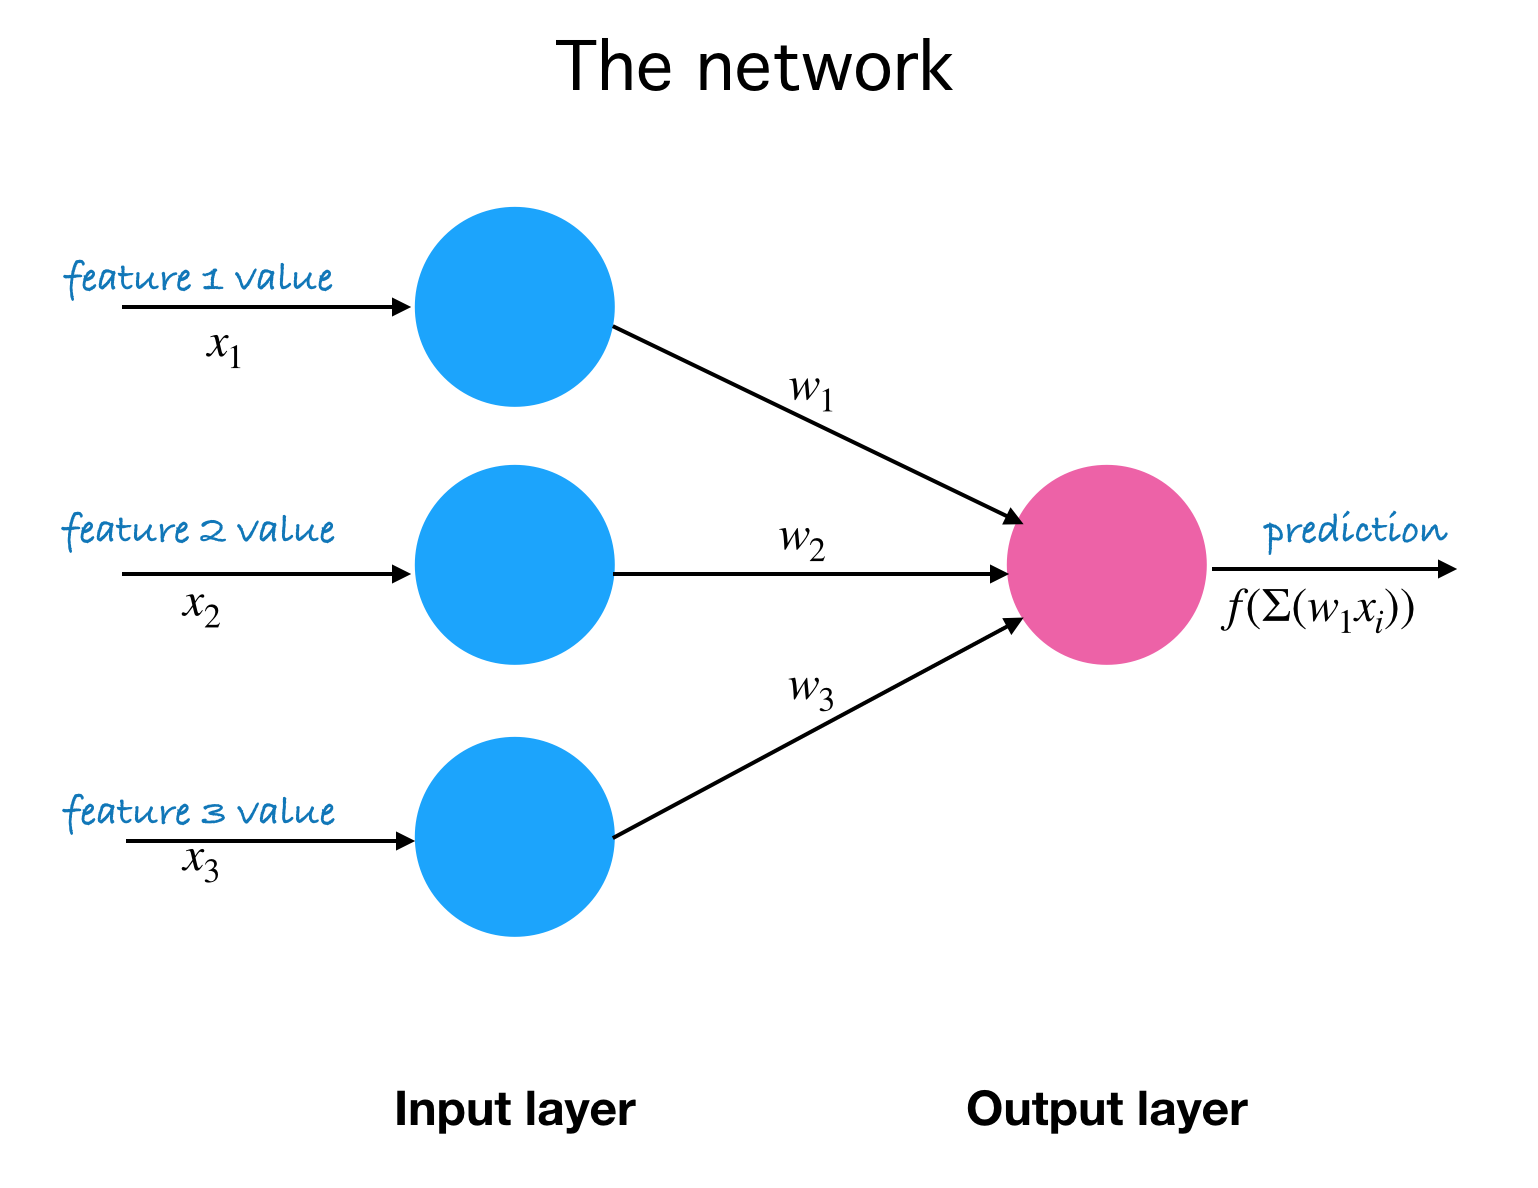

In [3]:
Image(filename="simple_network.png",height=500,width=500)

<h3>Define inputs and outputs</h3>

In [4]:
import numpy as np 
#Rick and Ilsa will always have Paris
#but, we'll always have numpy 

In [31]:
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
y = np.array([[0,0,1,1]]).T

<h3>Initialization</h3>
<li>generate random weights for every edge in the network
<li>we'll use np.random.random (generates random numbers between 0 and 1)
<li>and adjust the weights so that they are between -1 and 1

In [32]:
np.random.seed(2)
syn0 = 2*np.random.random((3,1)) - 1
syn0

array([[-0.1280102 ],
       [-0.94814754],
       [ 0.09932496]])

<h2>Define the activation function</h2>


<li>Let's see what our weighted sums look like

In [33]:
np.dot(X,syn0)

array([[ 0.09932496],
       [-0.84882258],
       [-0.02868524],
       [-0.97683278]])

In [34]:
y

array([[0],
       [0],
       [1],
       [1]])

<li>Nice. We could say that anything less than 0 is a 0 and anything greater than 0 is a 1
<li>And use these "predicted" 0s and 1s to compute the error
<li>And use these errors to adjust weights
<li>Not ideal, because:
<ul>
<li>learning would be binary and the model would keep switching from class 0 to class 1 
<li>what we would like is for learning to be smooth
<li>"hmm, looks like a class 1 but i'll just tweak the probability that it is a class 1 rather than switch entirely to a class 1"
<li>"that way, over time, I'll get more and more sure"

<h2>Sigmoid function</h2>
<small>https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg</small>


In [9]:
Image(url="https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg")


<li>We don't want to change weights linearly
<li>When we're more confident of a weight, we want to change it less
<li>When we're less confident of a weight, we want to change it more
<li>Sigmoid functions exhibit this property
<li>And return values between 0 and 1 
<li>Anything .5 or greater is a 1
<li>Anything less than .5 is a 0
<li>Or, for complex classification problems, we could figure out the right threshold value just like we did with regression

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
print(sigmoid(.9) - sigmoid(.85))
print(sigmoid(.3) - sigmoid(.25))
print(sigmoid(.05) - sigmoid(0))


0.010382360151031
0.012266015925860962
0.012497396484210332


<h2>Now let's train the network</h2>
<li>First we'll multiply X by the weight array
<li>The linear combination we talked about
<li>Then apply the sigmoid function to introduce nonlinearity and convert the total to a (0,1) range
<li>level_0: First (input layer)
<li>level_1: Second (hidden layer - output layer in our case)
<li>Then compute the error (y - level_1)
<li>Finally adjust the weights
<ul>
<li>The sigmoid function gives us the rate at which we want to move the weights
<li>multiply the error by the slope (derivative) at that point
<li>the slope at point x is d/dx sigmoid(x) = sigmoid(x)*(1-sigmoid(x))
<li>notice that the slope is lower at the extremes and higher in the middle!
<li>Use these deltas to adjust the weights
</ul>
<li>Repeat with the next set of training cases

In [42]:
def sigmoid(x,deriv=False):
    if deriv:
        return x*(1-x)
    return 1/(1+np.exp(-x))

def run_net(X,y,activation_function=sigmoid,passes=10):
    np.random.seed(1)
    syn0 = 2*np.random.random((3,1)) - 1    
    for i in range(0,passes):
        level_0 = X
        level_1 = activation_function(np.dot(level_0,syn0))
        level_1_error = y - level_1 #error
        level_1_delta = level_1_error * activation_function(level_1,True)
        syn0 += np.dot(level_0.T,level_1_delta)
    return syn0

In [41]:
level_1_error

array([[-0.41597215],
       [-0.37787096],
       [ 0.6150726 ],
       [ 0.65202448]])

In [43]:
final_weights = run_net(X,y,sigmoid,10)
final_weights

array([[ 1.72057624],
       [ 0.23669265],
       [-0.84074522]])

In [44]:
test_X = np.array([[1,1,1],[0,1,1],[1,0,0],[0,0,1]])
sigmoid(np.dot(test_X,final_weights))

array([[0.75334332],
       [0.35341708],
       [0.84820304],
       [0.30137786]])

<h2>Walkthrough</h2>

In [39]:
syn0 = 2*np.random.random((3,1)) - 1  
level_0 = X #Input layer
level_1 = sigmoid(np.dot(level_0,syn0)) #predicted y's
level_1_error = y - level_1 #error
level_1_delta = level_1_error * sigmoid(level_1,True) #change factor
# syn0 += np.dot(level_0.T,level_1_delta) #new weights

print(level_0)
print(level_1,"\n")
print(level_1_error,"\n")
print(level_1_delta,"\n")
print(syn0,"\n")
#print(y)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
[[0.41597215]
 [0.37787096]
 [0.3849274 ]
 [0.34797552]] 

[[-0.41597215]
 [-0.37787096]
 [ 0.6150726 ]
 [ 0.65202448]] 

[[-0.10105599]
 [-0.08883161]
 [ 0.14562354]
 [ 0.14793689]] 

[[-0.12935521]
 [-0.1592644 ]
 [-0.33933036]] 



In [40]:
np.dot(level_0.T,level_1_delta)

array([[0.29356043],
       [0.05910529],
       [0.10367284]])

<h2>Great! Let's try a different input</h2>
<li>If any two  or three are 1, then the class is 1
<li>Otherwise the class is zero

In [45]:
import numpy as np
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1],
             [1,1,0],
             [0,1,0],
             [1,0,0],
             [1,0,0]])
                
y = np.array([[0],[1],[1],[1],[1],[0],[0],[0]])

final_weights = run_net(X,y,sigmoid,10000)
test_X = np.array([[1,1,1],[0,1,1],[1,0,0],[0,0,1]])
sigmoid(np.dot(test_X,final_weights))

array([[0.78652135],
       [0.82954761],
       [0.43086044],
       [0.68809156]])

<h2>Terrible!</h2>

<li>The pattern here is non-linear
<li>Solution: Add another layer to the network

<h2>Three layer network</h2>
<li>Input
<li>Hidden
<li>Output
<li>We need two sets of weights 
<li>Input layer has 3 nodes
<li>Hidden layer has 4 nodes
<li>Output layer has 1 node

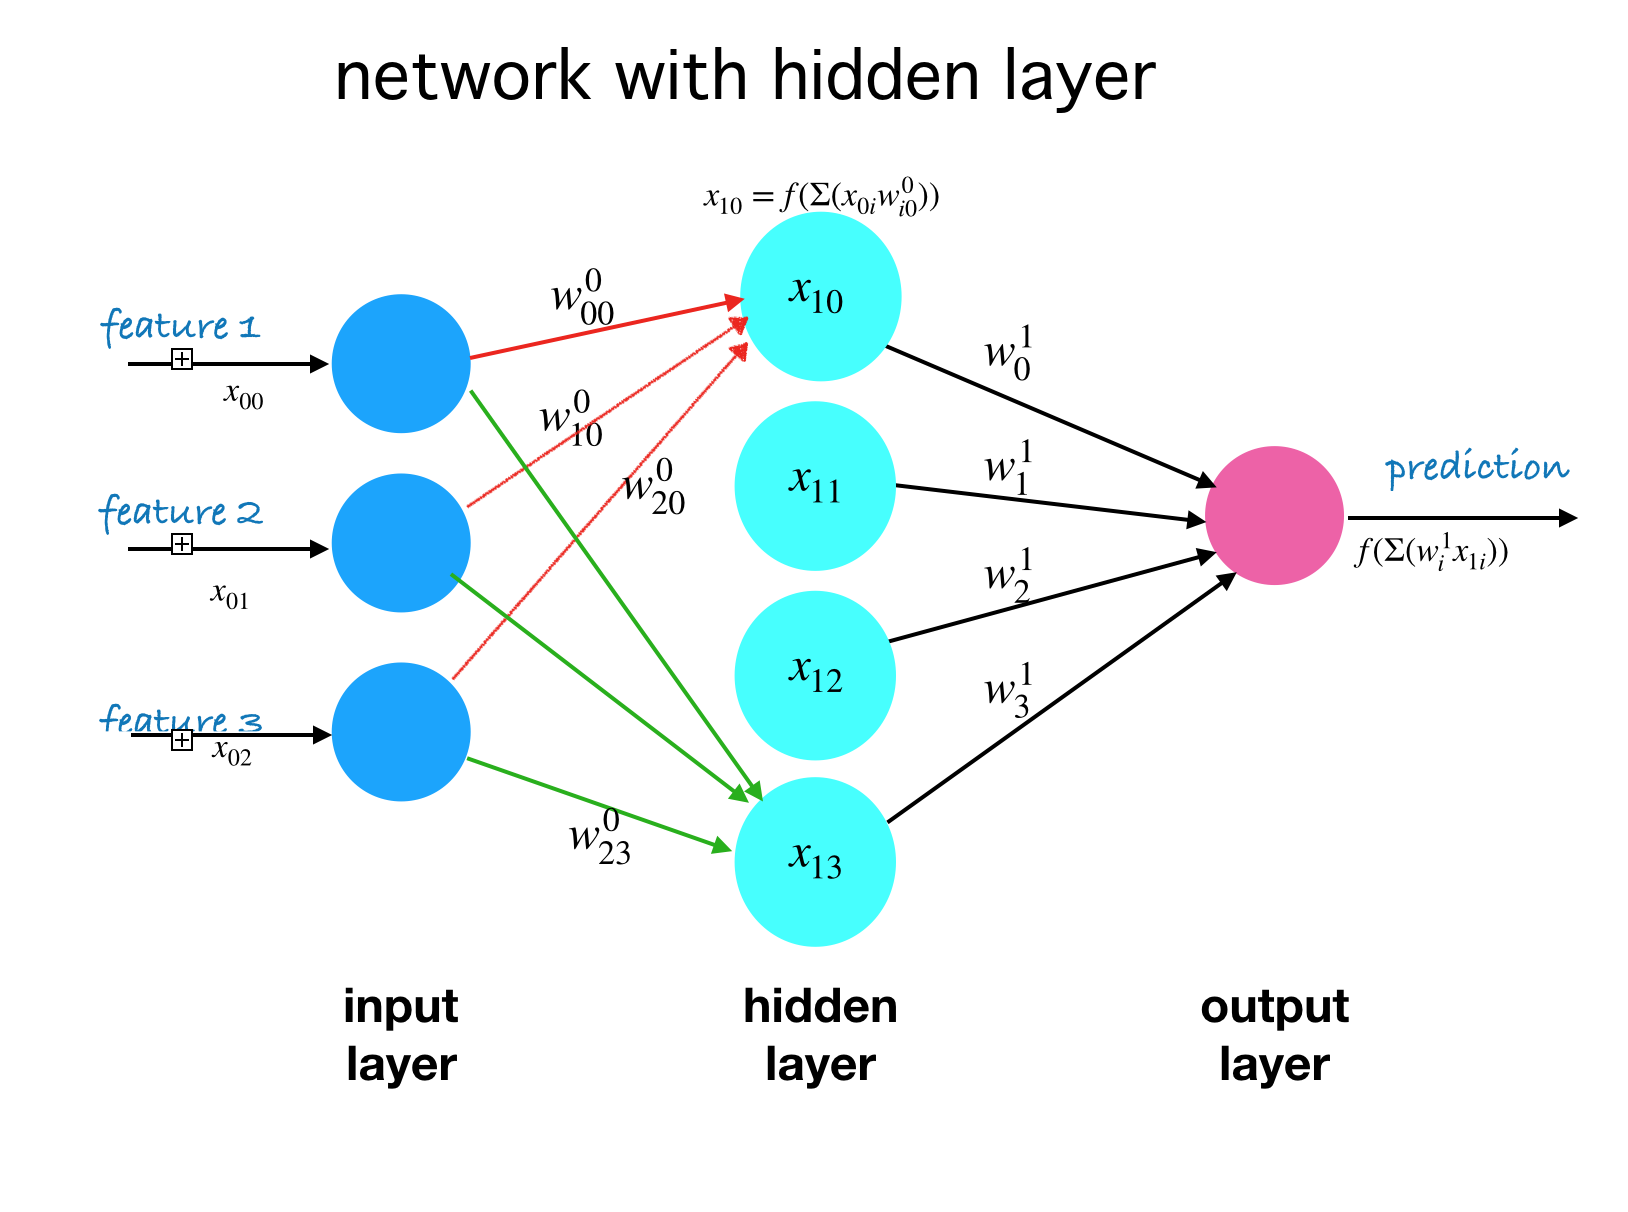

In [17]:
Image(filename="multi layer network.png",height=500,width=500)

<h2>Initialize</h2>
<li>randomly assign weights at each level

In [49]:
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1


In [47]:
level_1

array([[0.41597215],
       [0.37787096],
       [0.3849274 ],
       [0.34797552]])

<h3>Calculate node outputs at each level</h3>

In [51]:
level_0 = X
level_1 = sigmoid(np.dot(level_0,syn0))
print(level_1)
level_2 = sigmoid(np.dot(level_1,syn1))
print(level_2)

[[0.59156505 0.35638354 0.68053573 0.27984616]
 [0.51538526 0.31054758 0.69717225 0.24846127]
 [0.49377636 0.21457195 0.48523231 0.1718312 ]
 [0.41732254 0.18182244 0.50463625 0.15003643]
 [0.33087873 0.28639589 0.32350963 0.31236398]
 [0.4233885  0.44856632 0.51939863 0.45968497]
 [0.40243371 0.33037528 0.3067574  0.34808226]
 [0.40243371 0.33037528 0.3067574  0.34808226]]
[[0.5053376 ]
 [0.50687089]
 [0.51655106]
 [0.51587768]
 [0.46972561]
 [0.45029194]
 [0.46710261]
 [0.46710261]]


In [54]:
# np.dot(level_0,syn0)
level_0.dot(syn0)

array([[ 0.370439  , -0.5910955 ,  0.75623487, -0.94522481],
       [ 0.06156045, -0.79756055,  0.83386834, -1.10683578],
       [-0.02489585, -1.29758372, -0.05908794, -1.57270439],
       [-0.3337744 , -1.50404877,  0.01854553, -1.73431536],
       [-0.7042134 , -0.91295327, -0.73768934, -0.78909055],
       [-0.30887855, -0.20646505,  0.07763347, -0.16161097],
       [-0.39533485, -0.70648822, -0.81532281, -0.62747958],
       [-0.39533485, -0.70648822, -0.81532281, -0.62747958]])

<h2>Backpropagation</h2>
<li>Calculate the error between predicted values (output layer) and actual values
<li>propagate these errors back through the net, adjusting weights 


In [52]:
level_2_error = y - level_2
level_2_error

array([[-0.5053376 ],
       [ 0.49312911],
       [ 0.48344894],
       [ 0.48412232],
       [ 0.53027439],
       [-0.45029194],
       [-0.46710261],
       [-0.46710261]])

In [23]:
level_2_delta = level_2_error*sigmoid(level_2,deriv=True)

<li>Next, propagate the deltas back toward the input layer

In [24]:
level_1_error = level_2_delta.dot(syn1.T)
level_1_delta = level_1_error * sigmoid(level_1,deriv=True)

<li>Calculate the new weights

In [25]:
syn1 += level_1.T.dot(level_2_delta)
syn0 += level_0.T.dot(level_1_delta)

<h2>Putting it all together</h2>

In [26]:
def sigmoid(x,deriv=False):
    if deriv:
        return x*(1-x)
    return 1/(1+np.exp(-x))

def run_net(X,y,activation_function=sigmoid,passes=10):
    import time
    np.random.seed(1)
    syn0 = 2*np.random.random((3,4)) - 1
    syn1 = 2*np.random.random((4,1)) - 1

    for i in range(passes):
        level_0 = X
        level_1 = activation_function(np.dot(level_0,syn0))
        level_2 = activation_function(np.dot(level_1,syn1))

        level_2_error = y - level_2

        level_2_delta = level_2_error*activation_function(level_2,deriv=True)

        level_1_error = level_2_delta.dot(syn1.T)

        level_1_delta = level_1_error * activation_function(level_1,deriv=True)

        syn1 += level_1.T.dot(level_2_delta)
        syn0 += level_0.T.dot(level_1_delta)
    print(level_2)
    return syn0,syn1

In [27]:
syn0,syn1 = run_net(X,y,activation_function=sigmoid,passes=100)


[[0.29038182]
 [0.7597043 ]
 [0.72788203]
 [0.90378096]
 [0.73607507]
 [0.28925349]
 [0.19580023]
 [0.19580023]]


<h3>Applying the net to test cases</h3>


In [28]:
test_X

array([[1, 1, 1],
       [0, 1, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [29]:
level_0 = test_X
level_1 = sigmoid(np.dot(level_0,syn0))
level_2 = sigmoid(np.dot(level_1,syn1))
level_2

array([[0.90480965],
       [0.76030727],
       [0.19489967],
       [0.28910602]])